In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

In [2]:
def metrics_print(test_y, test_y_hat):
    r2 = r2_score(test_y, test_y_hat)
    print("R2 ", r2)
    # MAE
    print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

    #MSE
    print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

    #RMSE
    print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))


    return

In [3]:
import pwlf

In [4]:
lc2 = pd.read_csv("Feb15/LC2_18Jan.csv")

/home/jayati/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
lc2

,created_at,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,2020-10-09 11:52:30 IST,57.1,51.5,75.02,27.98,1.28,0.32,0.11
1,2020-10-09 11:53:00 IST,57.5,51.6,74.86,27.99,1.23,0.33,0.11
2,2020-10-09 11:53:30 IST,59.2,53.2,74.89,27.98,1.17,0.35,0.1
3,2020-10-09 11:54:00 IST,57.5,51.8,74.86,27.96,1.17,0.36,0.09
4,2020-10-09 11:54:30 IST,58.3,52.6,74.86,27.94,1.11,0.37,0.09
...,...,...,...,...,...,...,...,...
269859,2021-01-18 18:57:30 IST,39.7,36.3,44.32,30.05,0.48,4.87,0.01
269860,2021-01-18 18:58:00 IST,39.0,35.8,44.35,30.04,0.48,4.87,0.01
269861,2021-01-18 18:58:30 IST,40.1,36.7,44.35,30.03,0.48,4.87,0.01
269862,2021-01-18 18:59:00 IST,39.4,36.2,44.35,30.04,0.48,4.83,0.02


In [6]:
lc2['created_at'] = lc2['created_at'].astype(str).str[:-4]
lc2['created_at'] = pd.to_datetime(lc2['created_at'])

In [7]:
lc2

,created_at,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,2020-10-09 11:52:30,57.1,51.5,75.02,27.98,1.28,0.32,0.11
1,2020-10-09 11:53:00,57.5,51.6,74.86,27.99,1.23,0.33,0.11
2,2020-10-09 11:53:30,59.2,53.2,74.89,27.98,1.17,0.35,0.1
3,2020-10-09 11:54:00,57.5,51.8,74.86,27.96,1.17,0.36,0.09
4,2020-10-09 11:54:30,58.3,52.6,74.86,27.94,1.11,0.37,0.09
...,...,...,...,...,...,...,...,...
269859,2021-01-18 18:57:30,39.7,36.3,44.32,30.05,0.48,4.87,0.01
269860,2021-01-18 18:58:00,39.0,35.8,44.35,30.04,0.48,4.87,0.01
269861,2021-01-18 18:58:30,40.1,36.7,44.35,30.03,0.48,4.87,0.01
269862,2021-01-18 18:59:00,39.4,36.2,44.35,30.04,0.48,4.83,0.02


In [8]:
cpcb = pd.read_csv("Air_pollution/Air-Pollution/Data/Airveda&cpcb_15min.csv")

In [9]:
cpcb['created_at'] = pd.to_datetime(cpcb['created_at'], dayfirst = True)

In [10]:
cpcb

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10
0,0,2020-11-01 00:00:00,82.0,127.0,73,172
1,1,2020-11-01 00:15:00,83.0,125.0,73,172
2,2,2020-11-01 00:30:00,76.0,117.0,73,172
3,3,2020-11-01 01:00:00,81.0,120.5,80,158
4,4,2020-11-01 01:15:00,83.0,118.0,80,158
...,...,...,...,...,...,...
2703,2703,2020-12-06 00:45:00,61.0,103.0,52,109
2704,2704,2020-12-07 11:15:00,57.0,95.0,34,85
2705,2705,2020-12-07 11:30:00,49.0,84.0,34,85
2706,2706,2020-12-07 11:45:00,49.0,81.0,33,84


In [11]:
comb = pd.merge(cpcb, lc2,  
                   on='created_at',  
                   how='inner') 

In [12]:
comb

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,0,2020-11-01 00:00:00,82.0,127.0,73,172,62.7,56.6,47.11,28.93,1,3.14,0.1
1,1,2020-11-01 00:15:00,83.0,125.0,73,172,61.3,55.4,48.89,28.94,1,2.60,0.11
2,2,2020-11-01 00:30:00,76.0,117.0,73,172,59.4,53.8,48.96,28.71,1.06,2.33,0.13
3,3,2020-11-01 01:00:00,81.0,120.5,80,158,60.7,54.9,50.21,28.45,1.11,1.91,0.15
4,4,2020-11-01 01:15:00,83.0,118.0,80,158,56.3,50.7,51.74,28.34,1.17,1.51,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2677,2020-12-05 17:45:00,40.0,86.0,37,106,26.4,22.2,40.15,26.75,0.44,9.78,0.01
2595,2681,2020-12-05 18:45:00,48.0,95.0,51,148,33.6,27.6,46.78,24.73,0.44,6.08,0.02
2596,2705,2020-12-07 11:30:00,49.0,84.0,34,85,28.1,25.5,47.29,30.51,0.58,1.88,0.11
2597,2706,2020-12-07 11:45:00,49.0,81.0,33,84,27.1,24.7,43.79,31.61,0.53,2.48,0.08


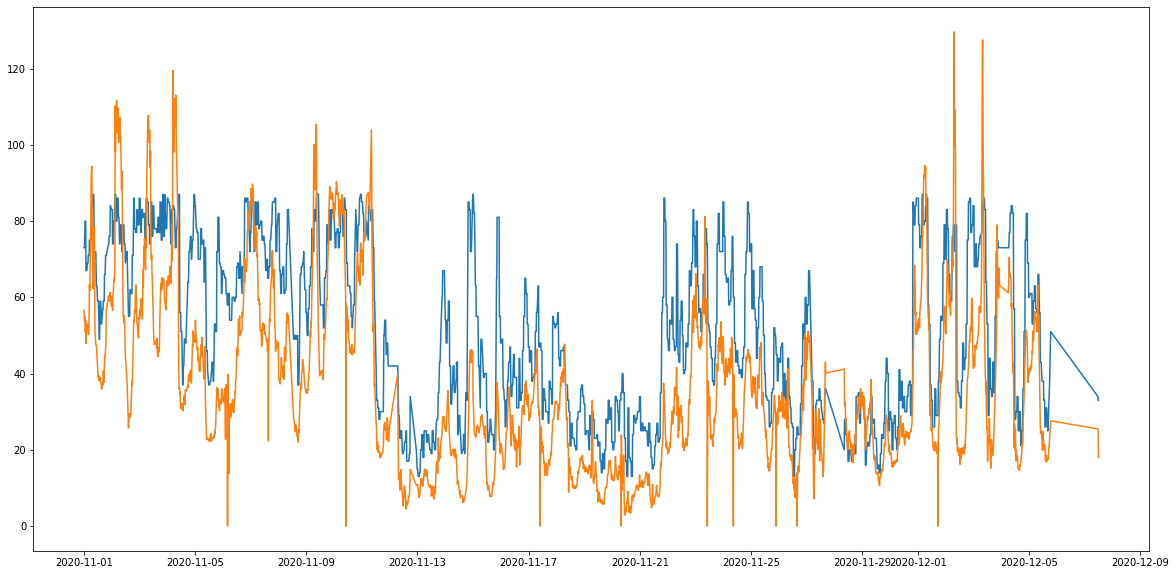

In [13]:
comb = comb[comb['RH_2'] <= 70]
plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb.cpcb_pm25)
plt.plot(comb.created_at, comb['PM2.5_2'])

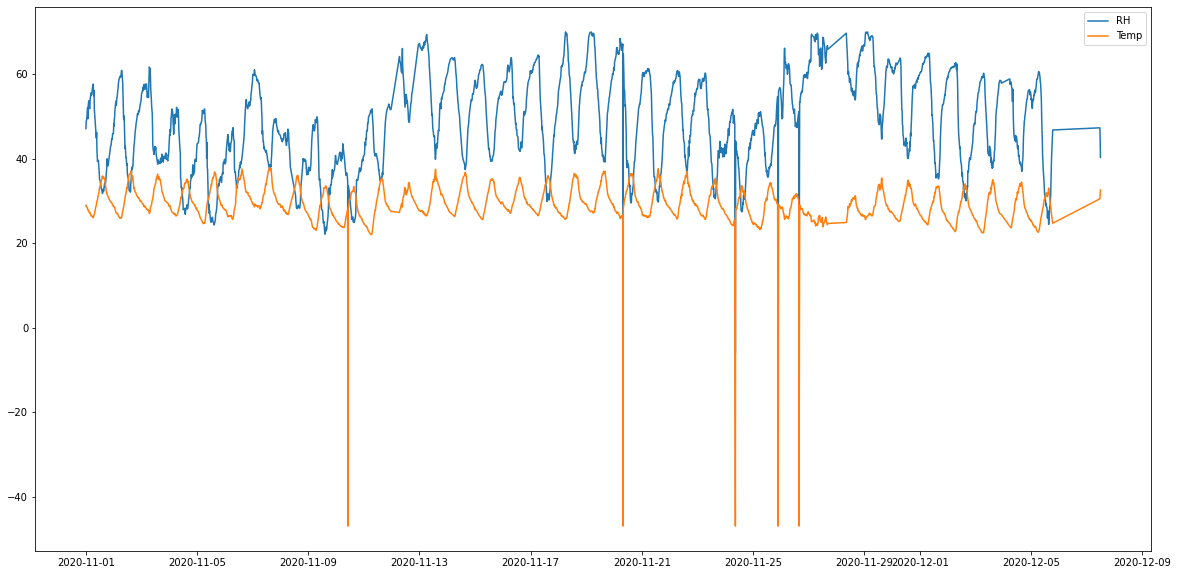

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb['RH_2'])
plt.plot(comb.created_at, comb['Temp_2'])
plt.legend(["RH", "Temp"])

In [15]:
comb = comb[comb['Temp_2'] >= 0]

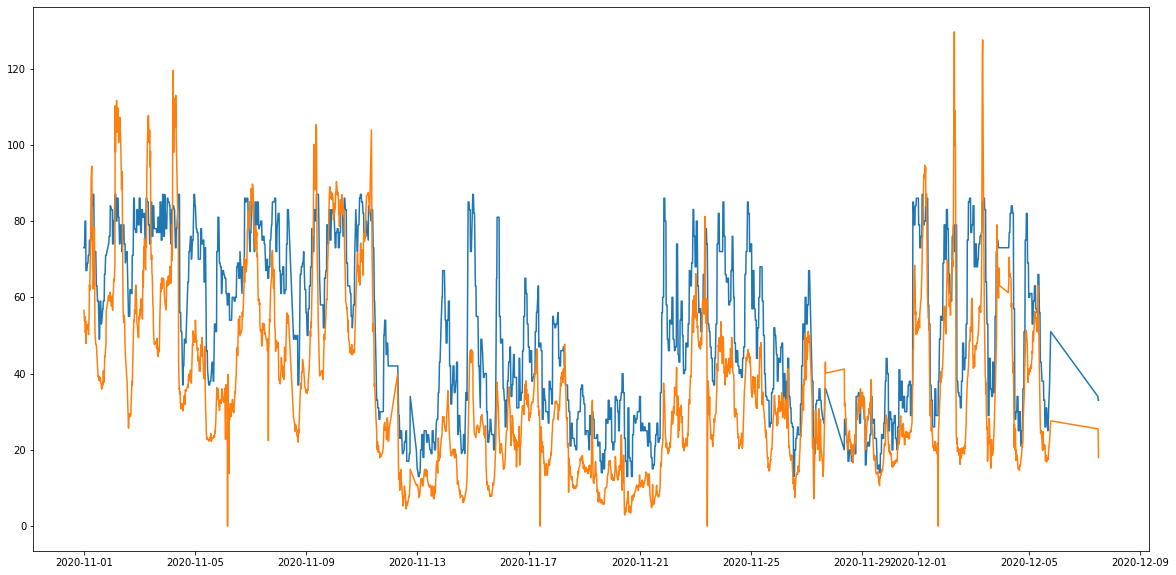

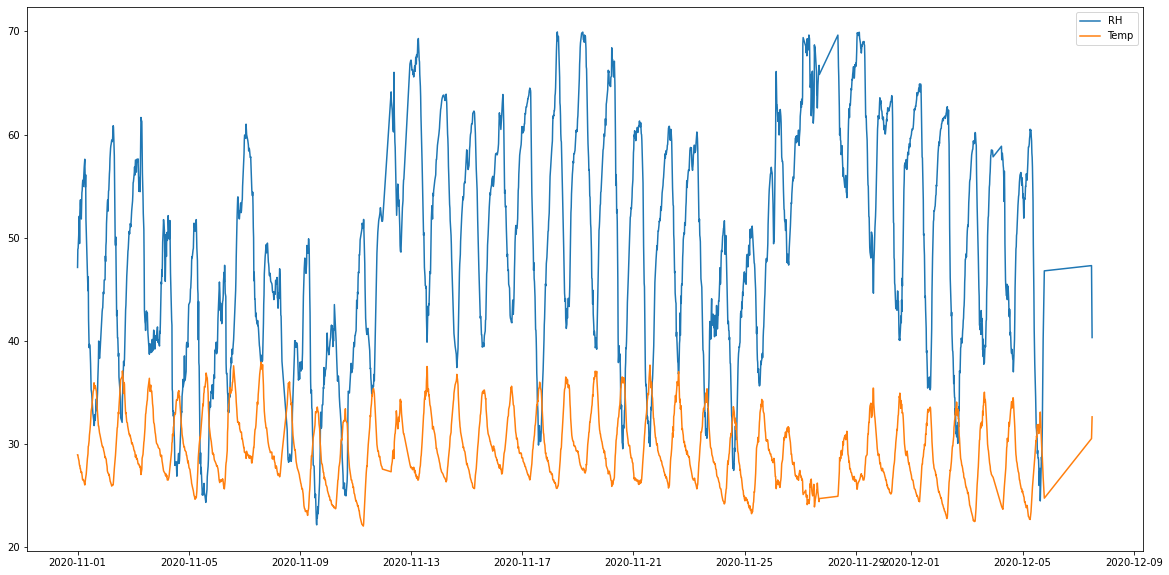

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb.cpcb_pm25)
plt.plot(comb.created_at, comb['PM2.5_2'])
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb['RH_2'])
plt.plot(comb.created_at, comb['Temp_2'])
plt.legend(["RH", "Temp"])

In [17]:
df = comb
msk = (np.random.rand(len(df)) < 0.8)
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train['PM2.5_2'])
train_y = np.asanyarray(train['cpcb_pm25'])
test_x = np.asanyarray(test['PM2.5_2'])
test_y = np.asanyarray(test['cpcb_pm25'])
x, y = train_x, train_y
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# # fit the data for four line segments
res = my_pwlf.fit(4)
# res = my_pwlf.fitfast(4, pop=3)

/usr/local/lib/python3.8/dist-packages/pwlf/pwlf.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  self.slopes[i] = (y_hat[i+1]-y_hat[i]) / \


R2  0.8069942337129333
MAE of simple linear regression 7.109091266234189
MSE of simple linear regression 91.35823507839406
RMSE of simple linear regression 9.558150191244856


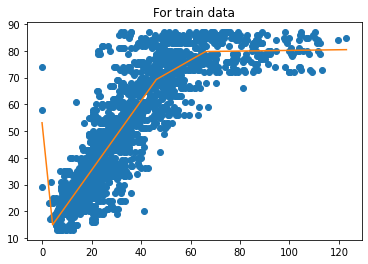

In [18]:
# # predict for the determined points
train_y_hat = my_pwlf.predict(train_x)
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)
metrics_print(train_y, train_y_hat)

# # plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("For train data")
plt.show()

R2  0.8243647309444082
MAE of simple linear regression 7.058887670607633
MSE of simple linear regression 88.97980414203124
RMSE of simple linear regression 9.432910692995627


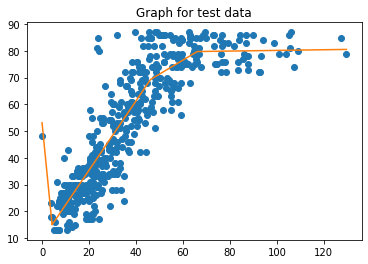

In [19]:
test_y_hat = my_pwlf.predict(test_x)
metrics_print(test_y, test_y_hat) 
# spearman = spearmanr(test_y, test_y_hat)
# spearman1 = spearmanr(train_x, train_y)
# print(f'Test data Spearman correlation of Piecewise linear regression: {spearman[0]:.3}')
# print(f'Train data Spearman correlation of Piecewise linear regression: {spearman1[0]:.3}')
xHat = np.linspace(min(test_x), max(test_x), num=10000)
yHat = my_pwlf.predict(xHat)
# # plot the results

plt.figure()
plt.plot(test_x, test_y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("Graph for test data")
plt.show()

In [20]:
PieceWise_Test_x = test_x
PieceWise_Test_y = test_y
PieceWise_Test_y_hat = test_y_hat

In [21]:
train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['cpcb_pm25']])

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['cpcb_pm25']])
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y.ravel()) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred



R2  0.6988745918317343
MAE of simple linear regression 9.539702352090229
MSE of simple linear regression 152.55523554623122
RMSE of simple linear regression 12.35132525465309
R2  0.773960708786732
MAE of simple linear regression 7.920203009509007
MSE of simple linear regression 114.51533606381781
RMSE of simple linear regression 10.701183862723685


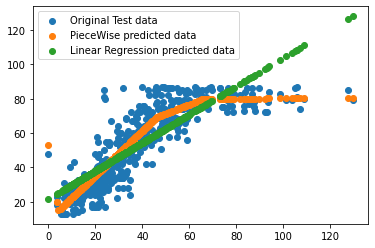

In [22]:
plt.scatter(PieceWise_Test_x, PieceWise_Test_y)

plt.scatter(PieceWise_Test_x, PieceWise_Test_y_hat)
plt.scatter(Linear_test_x, Linear_test_y_hat)
plt.legend(["Original Test data","PieceWise predicted data", "Linear Regression predicted data"])



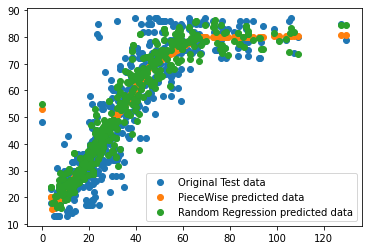

In [23]:
plt.scatter(PieceWise_Test_x, PieceWise_Test_y)
plt.scatter(PieceWise_Test_x, PieceWise_Test_y_hat)
plt.scatter(Random_test_x, Random_test_y_hat)
plt.legend(["Original Test data","PieceWise predicted data", "Random Regression predicted data"])

In [24]:
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.tree import DecisionTreeRegressor

train_x = np.asanyarray(train[['lc2_pm25', 'lc2_pm10']])
train_y = np.asanyarray(train[['cpcb_pm25']])

test_x = np.asanyarray(test[['lc2_pm25', 'lc2_pm10']])
test_y = np.asanyarray(test[['cpcb_pm25']])
model = PiecewiseRegressor(verbose=True,
                           binner=DecisionTreeRegressor(min_samples_leaf=300))
model.fit(train_x, train_y)

KeyError: "None of [Index(['lc2_pm25', 'lc2_pm10'], dtype='object')] are in the [columns]"

In [132]:
pred = model.predict(train_x)

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

In [25]:
#5, 45, 70
msk = (np.random.rand(len(df)) < 0.8)
train = df[msk]
test = df[~msk]

In [26]:
train_1 = train[train['PM2.5_2'] < 5]
train_2 = train[(train['PM2.5_2'] < 45) & (train['PM2.5_2'] >= 5)]
train_3 = train[(train['PM2.5_2'] < 70) & (train['PM2.5_2'] >= 45)]
train_4 = train[train['PM2.5_2'] >= 70]

test_1 = test[test['PM2.5_2'] < 5]
test_2 = test[(test['PM2.5_2'] < 45) & (test['PM2.5_2'] >= 5)]
test_3 = test[(test['PM2.5_2'] < 70) & (test['PM2.5_2'] >= 45)]
test_4 = test[test['PM2.5_2'] >= 70]


****************** <5 ******************* 
R2  0.8911127869816254
MAE of simple linear regression 3.2807647697085347
MSE of simple linear regression 17.340288673176147
RMSE of simple linear regression 4.164167224449103
****************** <45 ******************* 
R2  0.6477044296775489
MAE of simple linear regression 7.645606509251689
MSE of simple linear regression 105.90165964910194
RMSE of simple linear regression 10.290853203165515
****************** <70 ******************* 
R2  0.07621614036315438
MAE of simple linear regression 7.012633158931213
MSE of simple linear regression 74.91801010121183
RMSE of simple linear regression 8.65551905440753
****************** >70 ******************* 
R2  -0.021431462714871063
MAE of simple linear regression 4.206650080563788
MSE of simple linear regression 23.17836516430493
RMSE of simple linear regression 4.814391463550189


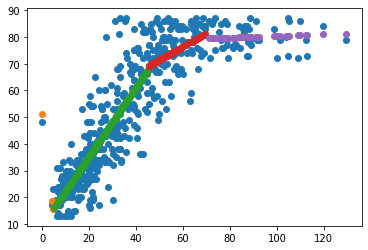

R2  0.6918474575656388
MAE of simple linear regression 9.878955961139777
MSE of simple linear regression 160.28450115843694
RMSE of simple linear regression 12.660351541660956
R2  0.7812973664771363
MAE of simple linear regression 7.902713724117275
MSE of simple linear regression 113.75743402706324
RMSE of simple linear regression 10.665713010721001


<ipython-input-27-98f7336b922f>:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


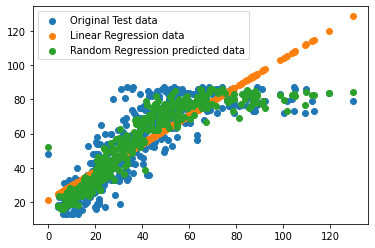

In [27]:
train_x = train[['PM2.5_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2']]
test_y = test[['cpcb_pm25']]

train_x_1 = train_1[['PM2.5_2']]
train_y_1 = train_1[['cpcb_pm25']]
train_x_2 = train_2[['PM2.5_2']]
train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2']]
train_y_4 = train_4[['cpcb_pm25']]

test_x_1 = test_1[['PM2.5_2']]
test_y_1 = test_1[['cpcb_pm25']]
test_x_2 = test_2[['PM2.5_2']]
test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2']]
test_y_4 = test_4[['cpcb_pm25']]
print("****************** <5 ******************* ")
regr_1 = linear_model.LinearRegression()
regr_1.fit (train_x_1, train_y_1)
test_y_hat_1 = regr_1.predict(test_x_1)
metrics_print(test_y_1, test_y_hat_1)

print("****************** <45 ******************* ")
regr_2 = linear_model.LinearRegression()
regr_2.fit (train_x_2, train_y_2)
test_y_hat_2 = regr_2.predict(test_x_2)
metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)
plt.show()
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x, test_y)
plt.scatter(Linear_test_x, Linear_test_y_hat)
plt.scatter(Random_test_x, Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])

****************** <5 ******************* 
R2  0.8699383178328355
MAE of simple linear regression 4.0797447053648686
MSE of simple linear regression 20.712322885120955
RMSE of simple linear regression 4.551079309913304
****************** <45 ******************* 
R2  0.6964766605367553
MAE of simple linear regression 7.078924525350198
MSE of simple linear regression 91.24050399491192
RMSE of simple linear regression 9.5519895307162
****************** <70 ******************* 
R2  0.13881201710154611
MAE of simple linear regression 6.739358949668869
MSE of simple linear regression 69.84154283361465
RMSE of simple linear regression 8.357125273299106
****************** >70 ******************* 
R2  -0.06154452438248259
MAE of simple linear regression 4.250329811254582
MSE of simple linear regression 24.08861242526063
RMSE of simple linear regression 4.908015120724531


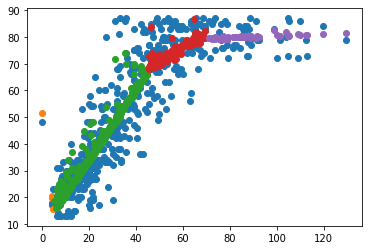

R2  0.6985052002079604
MAE of simple linear regression 9.971420862562333
MSE of simple linear regression 156.82149887445263
RMSE of simple linear regression 12.522839090016793
R2  0.9572825766909488
MAE of simple linear regression 3.0882981323946415
MSE of simple linear regression 22.219323039736086
RMSE of simple linear regression 4.7137376931407715


<ipython-input-28-cccd28a62dd7>:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


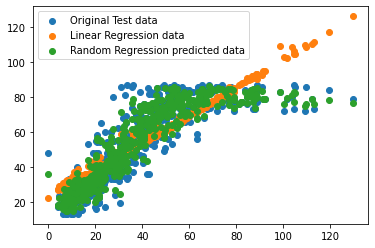

In [28]:
train_x = test[['PM2.5_2', 'PM10_2']]
train_y = test[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'PM10_2']]
test_y = test[['cpcb_pm25']]

train_x_1 = train_1[['PM2.5_2', 'PM10_2']]
train_y_1 = train_1[['cpcb_pm25']]
train_x_2 = train_2[['PM2.5_2', 'PM10_2']]
train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'PM10_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'PM10_2']]
train_y_4 = train_4[['cpcb_pm25']]

test_x_1 = test_1[['PM2.5_2', 'PM10_2']]
test_y_1 = test_1[['cpcb_pm25']]
test_x_2 = test_2[['PM2.5_2', 'PM10_2']]
test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'PM10_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'PM10_2']]
test_y_4 = test_4[['cpcb_pm25']]

print("****************** <5 ******************* ")
regr_1 = linear_model.LinearRegression()
regr_1.fit (train_x_1, train_y_1)
test_y_hat_1 = regr_1.predict(test_x_1)
metrics_print(test_y_1, test_y_hat_1)

print("****************** <45 ******************* ")
regr_2 = linear_model.LinearRegression()
regr_2.fit (train_x_2, train_y_2)
test_y_hat_2 = regr_2.predict(test_x_2)
metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)
plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)
plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])

In [29]:
## "For Random Forest algorithm"
y_pred = regressor.predict(train_x)
metrics_print(train_y, y_pred)

R2  0.9572825766909488
MAE of simple linear regression 3.0882981323946415
MSE of simple linear regression 22.219323039736086
RMSE of simple linear regression 4.7137376931407715


****************** <5 ******************* 
R2  0.8574483193308335
MAE of simple linear regression 4.407416117571992
MSE of simple linear regression 22.70135514656475
RMSE of simple linear regression 4.764593912031198
****************** <45 ******************* 
R2  0.6813528573540328
MAE of simple linear regression 7.201427464851924
MSE of simple linear regression 95.78678839976756
RMSE of simple linear regression 9.787072514279618
****************** <70 ******************* 
R2  0.12453810443020785
MAE of simple linear regression 6.778926840591962
MSE of simple linear regression 70.999143848765
RMSE of simple linear regression 8.426098969794088
****************** >70 ******************* 
R2  0.005375096199873974
MAE of simple linear regression 4.1545781885305075
MSE of simple linear regression 22.57006961633643
RMSE of simple linear regression 4.750796734899993


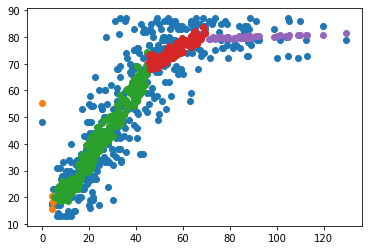

R2  0.707243172811554
MAE of simple linear regression 9.604041152629595
MSE of simple linear regression 152.2764720223655
RMSE of simple linear regression 12.340035333108471
R2  0.8406681743800565
MAE of simple linear regression 6.481471594798083
MSE of simple linear regression 82.87590939995437
RMSE of simple linear regression 9.103620675311245


<ipython-input-30-a1ad8cb59b87>:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


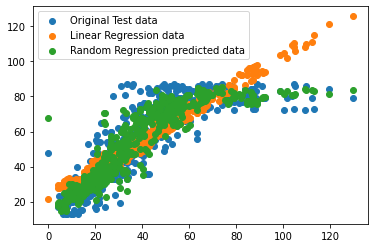

In [30]:
train_x = train[['PM2.5_2', 'RH_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'RH_2']]
test_y = test[['cpcb_pm25']]

train_x_1 = train_1[['PM2.5_2', 'RH_2']]
train_y_1 = train_1[['cpcb_pm25']]
train_x_2 = train_2[['PM2.5_2', 'RH_2']]
train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'RH_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'RH_2']]
train_y_4 = train_4[['cpcb_pm25']]

test_x_1 = test_1[['PM2.5_2', 'RH_2']]
test_y_1 = test_1[['cpcb_pm25']]
test_x_2 = test_2[['PM2.5_2', 'RH_2']]
test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'RH_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'RH_2']]
test_y_4 = test_4[['cpcb_pm25']]
print("****************** <5 ******************* ")
regr_1 = linear_model.LinearRegression()
regr_1.fit (train_x_1, train_y_1)
test_y_hat_1 = regr_1.predict(test_x_1)
metrics_print(test_y_1, test_y_hat_1)

print("****************** <45 ******************* ")
regr_2 = linear_model.LinearRegression()
regr_2.fit (train_x_2, train_y_2)
test_y_hat_2 = regr_2.predict(test_x_2)
metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)

plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])


****************** <5 ******************* 
R2  0.8637430793015214
MAE of simple linear regression 4.348304776796089
MSE of simple linear regression 21.698914621232714
RMSE of simple linear regression 4.658209379282206
****************** <45 ******************* 
R2  0.6860943925816827
MAE of simple linear regression 7.078044651897935
MSE of simple linear regression 94.36146122510792
RMSE of simple linear regression 9.713982768417283
****************** <70 ******************* 
R2  0.1347950375788658
MAE of simple linear regression 6.76562973439442
MSE of simple linear regression 70.16731612930182
RMSE of simple linear regression 8.376593348689061
****************** >70 ******************* 
R2  0.0008050364220401063
MAE of simple linear regression 4.163891009920354
MSE of simple linear regression 22.673773602575302
RMSE of simple linear regression 4.761698604760207


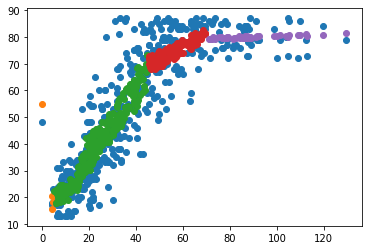

R2  0.7083775643815573
MAE of simple linear regression 9.5372432997856
MSE of simple linear regression 151.6864220896928
RMSE of simple linear regression 12.31610417663365
R2  0.8678232407001107
MAE of simple linear regression 5.7737166324435325
MSE of simple linear regression 68.75129363449693
RMSE of simple linear regression 8.29163998461685


<ipython-input-31-79ee163335a5>:69: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


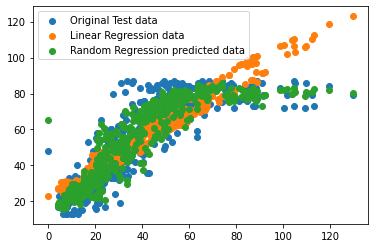

In [31]:
train_x = train[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y = test[['cpcb_pm25']]

train_x_1 = train_1[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_1 = train_1[['cpcb_pm25']]
train_x_2 = train_2[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_4 = train_4[['cpcb_pm25']]

test_x_1 = test_1[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_1 = test_1[['cpcb_pm25']]
test_x_2 = test_2[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_4 = test_4[['cpcb_pm25']]
print("****************** <5 ******************* ")
regr_1 = linear_model.LinearRegression()
regr_1.fit (train_x_1, train_y_1)
test_y_hat_1 = regr_1.predict(test_x_1)
metrics_print(test_y_1, test_y_hat_1)

print("****************** <45 ******************* ")
regr_2 = linear_model.LinearRegression()
regr_2.fit (train_x_2, train_y_2)
test_y_hat_2 = regr_2.predict(test_x_2)
metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)


plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])

